In [1]:
# get imports and load in data

import pandas as pd
import matplotlib.pyplot as plt

cols = ["MonAM", "MonPM", "TueAM", "TuePM", "WedAM", "WedPM", 
        "ThuAM", "ThuPM", "FriAM", "FriPM", "SatAM", "SatPM", "Sun"]
turnipDf = pd.read_csv("turnips.csv", header=None,
    names=cols)
# reorder so we look at sunday first
cols = ["Sun", "MonAM", "MonPM", "TueAM", "TuePM", "WedAM", "WedPM", 
        "ThuAM", "ThuPM", "FriAM", "FriPM", "SatAM", "SatPM"]
print("Rows: ", len(turnipDf))
turnipDf.head()

Rows:  1065


,MonAM,MonPM,TueAM,TuePM,WedAM,WedPM,ThuAM,ThuPM,FriAM,FriPM,SatAM,SatPM,Sun
0,67.0,64.0,60.0,57.0,52.0,118.0,91.0,142.0,NaN,NaN,NaN,NaN,NaN
1,79.0,75.0,72.0,69.0,65.0,61.0,115.0,110.0,NaN,NaN,NaN,NaN,NaN
2,78.0,76.0,74.0,70.0,60.0,63.0,136.0,135.0,NaN,NaN,NaN,NaN,NaN
3,137.0,111.0,153.0,161.0,154.0,50.0,50.0,55.0,NaN,NaN,NaN,NaN,NaN
4,48.0,46.0,43.0,41.0,38.0,36.0,107.0,122.0,NaN,NaN,NaN,NaN,NaN


In [2]:
# get dataframe with just complete data

compTurnipDf = turnipDf.dropna()
print("Rows: ", len(compTurnipDf))
compTurnipDf.head()

Rows:  262


,MonAM,MonPM,TueAM,TuePM,WedAM,WedPM,ThuAM,ThuPM,FriAM,FriPM,SatAM,SatPM,Sun
25,95.0,91.0,86.0,82.0,78.0,74.0,69.0,126.0,192.0,631.0,159.0,99.0,107.0
27,72.0,68.0,62.0,58.0,52.0,50.0,149.0,118.0,186.0,208.0,180.0,55.0,93.0
41,60.0,113.0,96.0,136.0,152.0,133.0,52.0,48.0,42.0,42.0,39.0,34.0,104.0
47,68.0,65.0,62.0,59.0,55.0,51.0,132.0,99.0,168.0,192.0,190.0,63.0,99.0
51,69.0,65.0,100.0,116.0,161.0,191.0,169.0,90.0,86.0,82.0,79.0,72.0,102.0


Instances of buy prices:  959
Lowest buy price:  1.0
Highest buy price:  150.0


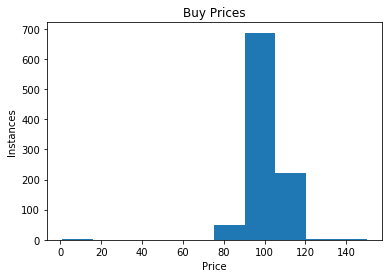

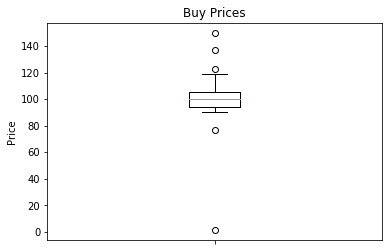

In [3]:
# some basic summary data from all data (including incomplete)

buyPrices = turnipDf["Sun"].dropna().tolist()

print("Instances of buy prices: ", len(buyPrices))
print("Lowest buy price: ", min(buyPrices)) # might be erranous
print("Highest buy price: ", max(buyPrices))

plt.hist(buyPrices)
plt.title("Buy Prices")
plt.xlabel("Price")
plt.ylabel("Instances")
plt.show()

plt.boxplot(buyPrices, labels=[""])
plt.title("Buy Prices")
plt.ylabel("Price")
plt.show()

Lowest buy price (complete data):  90.0
Highest buy price (complete data):  137.0

Lowest sell(able) price (complete data):  10.0
Highest sell(able) price (complete data):  631.0


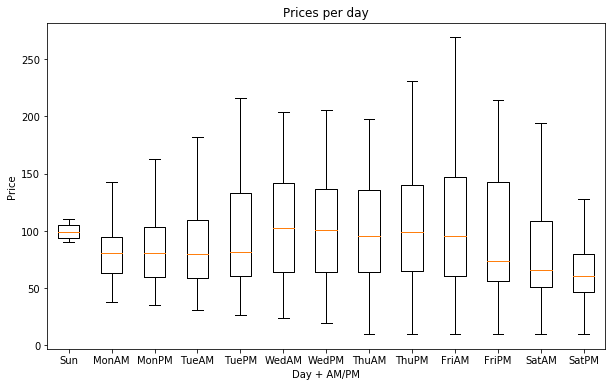

In [4]:
# Look at only complete data for overall analysis of prices as
# incomplete data may be biased due to not tracking after sale.

print("Lowest buy price (complete data): ", min(compTurnipDf["Sun"]))
print("Highest buy price (complete data): ", max(compTurnipDf["Sun"]))
print("\nLowest sell(able) price (complete data): ", compTurnipDf.drop("Sun", axis=1).to_numpy().min())
print("Highest sell(able) price (complete data): ", compTurnipDf.drop("Sun", axis=1).to_numpy().max())

plt.figure(figsize=(10,6))
plt.boxplot([compTurnipDf[col] for col in cols], labels=cols,
           showfliers=False)
plt.title("Prices per day")
plt.xlabel("Day + AM/PM")
plt.ylabel("Price")
plt.show()

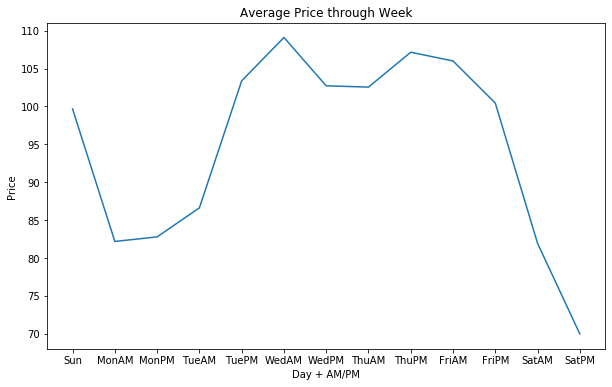

In [5]:
# average price tragectory through week

plt.figure(figsize=(10,6))
plt.plot(cols, [compTurnipDf[col].mean() for col in cols])
plt.title("Average Price through Week")
plt.xlabel("Day + AM/PM")
plt.ylabel("Price")
plt.show()